In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier

## 1. Data loading, preprocessing, and exploration

### 1.1 Data loading

In [2]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
# An ordered list of the class names
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

### 1.2 Preprocessing

The following cells include data normalization and data tranformation to accommodate to different algorithms.

- Random Forest: flatten the data into a vector
- MLP: split the training set into training and validation sets
- CNN: add an extra dimension

In [4]:
# Scale the data to be in [0, 1]
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# Flatten the data into a vector for random forest model
X_train_rf = np.zeros(shape = (len(X_train), X_train.shape[1]**2))
X_test_rf = np.zeros(shape = (len(X_test), X_test.shape[1]**2))

for i in range(0, len(X_train)):
    X_train_flatten = X_train[i].flatten()    
    X_train_rf[i] = X_train_flatten

for i in range(0, len(X_test)):
    X_test_flatten = X_test[i].flatten()
    X_test_rf[i] = X_test_flatten
    
print('Shape of X_train_rf: {}'.format(X_train_rf.shape))
print('Shape of X_test_rf: {}'.format(X_test_rf.shape))

Shape of X_train_rf: (60000, 784)
Shape of X_test_rf: (10000, 784)


In [5]:
# Flatten the data into a vector for random forest model
X_train_rf = np.zeros(shape = (len(X_train), X_train.shape[1]**2))
X_test_rf = np.zeros(shape = (len(X_test), X_test.shape[1]**2))

for i in range(0, len(X_train)):
    X_train_flatten = X_train[i].flatten()    
    X_train_rf[i] = X_train_flatten

for i in range(0, len(X_test)):
    X_test_flatten = X_test[i].flatten()
    X_test_rf[i] = X_test_flatten
    
print('Shape of X_train_rf: {}'.format(X_train_rf.shape))
print('Shape of X_test_rf: {}'.format(X_test_rf.shape))# Flatten the data into a vector for random forest model
X_train_rf = np.zeros(shape = (len(X_train), X_train.shape[1]**2))
X_test_rf = np.zeros(shape = (len(X_test), X_test.shape[1]**2))

for i in range(0, len(X_train)):
    X_train_flatten = X_train[i].flatten()    
    X_train_rf[i] = X_train_flatten

for i in range(0, len(X_test)):
    X_test_flatten = X_test[i].flatten()
    X_test_rf[i] = X_test_flatten
    
print('Shape of X_train_rf: {}'.format(X_train_rf.shape))
print('Shape of X_test_rf: {}'.format(X_test_rf.shape))

Shape of X_train_rf: (60000, 784)
Shape of X_test_rf: (10000, 784)


In [6]:
# Split the data into training and validation set
X_train_train, X_train_valid, y_train_train, y_train_valid = train_test_split(X_train, y_train,
                                                                              stratify = y_train,
                                                                              train_size=0.9,
                                                                              random_state=0)
print('X_train_train.shape: {}'.format(X_train_train.shape))
print('X_train_valid.shape: {}'.format(X_train_valid.shape))
print('y_train_train.shape: {}'.format(y_train_train.shape))
print('y_train_valid.shape: {}'.format(y_train_valid.shape))

X_train_train.shape: (54000, 28, 28)
X_train_valid.shape: (6000, 28, 28)
y_train_train.shape: (54000,)
y_train_valid.shape: (6000,)


In [7]:
# Add an extra dimension to data for CNN model
X_train_cnn = np.expand_dims(X_train, -1)
X_train_train_cnn = np.expand_dims(X_train_train, -1)
X_train_valid_cnn = np.expand_dims(X_train_valid, -1)
X_test_cnn = np.expand_dims(X_test, -1)

print(f'Shape of X_train_cnn: {X_train_cnn.shape}')
print(f'Shape of X_train_train_cnn: {X_train_train_cnn.shape}')
print(f'Shape of X_train_valid_cnn: {X_train_valid_cnn.shape}')
print(f'Shape of X_test_cnn: {X_test_cnn.shape}')

Shape of X_train_cnn: (60000, 28, 28, 1)
Shape of X_train_train_cnn: (54000, 28, 28, 1)
Shape of X_train_valid_cnn: (6000, 28, 28, 1)
Shape of X_test_cnn: (10000, 28, 28, 1)


### 1.3 Exploration

The following cells explore the labels of the data, examples in the training set, and potential challenges of similar features and pixel intensity.

In [8]:
# Check the format of the label
print('First five labels: {}'.format(y_train[:5]))

# List all unique labels
print('All unique labels: {}'.format(np.unique(y_train)))

First five labels: [9 0 0 3 0]
All unique labels: [0 1 2 3 4 5 6 7 8 9]


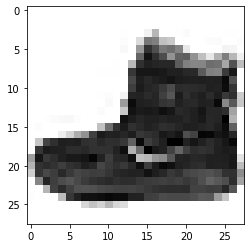

y: 9 -- Ankle boot


In [9]:
# Show the first example in the training set
plt.imshow(X_train[0], cmap = 'binary')
plt.show()

print('y: {} -- {}'.format(y_train[0], class_names[y_train[0]]))

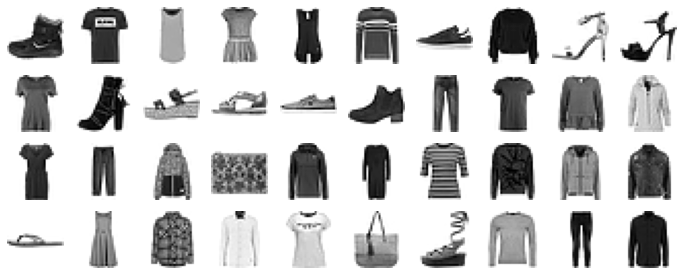

In [10]:
# Visualize more examples in a grid to better understand their characteristics
def plot_examples(data, n_rows=4, n_cols=10):
    """Plot a grid of fashion-MNIST examples of a specified size."""
    
    # Size figure depending on the size of the grid
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    
    for row in range(n_rows):
        for col in range(n_cols):
            
            # Get next index of image
            index = n_cols * row + col
            
            # Plot the image at appropriate place in grid
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')
            
    plt.show()
    
plot_examples(X_train)

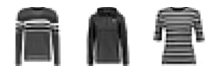

True class: ['Pullover', 'Coat', 'T-shirt/top']


In [11]:
# Challenge - similar features
example_list = [5, 24, 26]
y_true_class = [class_names[y_train[i]] for i in example_list]
plot_examples(X_train[example_list], n_rows = 1, n_cols = 3)
print('True class: {}'.format(y_true_class))

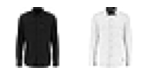

True class: ['Shirt', 'Shirt']


In [12]:
# Challenge - pixel intensity
example_list = [39, 33]
y_true_class = [class_names[y_train[i]] for i in example_list]
plot_examples(X_train[example_list], n_rows = 1, n_cols = 2)
print('True class: {}'.format(y_true_class))

## 2. Algorithm design and setup

### 2.1 Algorithm of choice from first six weeks of course

The first classifier we choose is random forest, which is an ensemble classifier that combines multiple simple tress to get a better prediction accuracy within a short time. The following cells fit the model with 10-fold cross validation, evaluate its performance on the test set, and shows some sample test results.

In [16]:
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF.fit(X_train_rf, y_train)
scores = cross_val_score(RF, X_train_rf, y_train, cv=10)
print('Average cross validation score: {:.4f}'.format(scores.mean()))

Average cross validation score: 0.8845


In [19]:
# Evaluate the model peformance on the test data
print('Random Forest accuracy on the test data: {:.4f}'.format(RF.score(X_test_rf,
                                                                        y_test)))

Random Forest accuracy on the test set: 0.8760


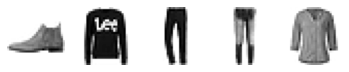

True class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Predicted class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


In [17]:
# Output sample test results
y_pred = RF.predict(X_test_rf[:5])
pred_class = [class_names[i] for i in y_pred]
true_class = [class_names[i] for i in y_test[:5]]
plot_examples(X_test, n_rows = 1, n_cols = 5)
print('True class: {}'.format(true_class))
print('Predicted class: {}'.format(pred_class))

### 2.2 Fully connected neural network

Our first MLP model relatively simple and conatins two hidden layers. For simplictiy, each hidden layer only have 100 neurons, and the optimizer and the loss function used is SGD and sparse_categorical_crossentropy, respectively. 

To find an appropriate number of epochs to run for the hyperparameter tuning process, we first run the model with 50 epochs under different learning rates to investigate the accuracy changes of the validation set over time.

In [15]:
mlp_model = keras.models.Sequential([
    
    # Input layer
    keras.layers.Flatten(input_shape=[28, 28]),
    
    # Hidden layers
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    
    # Output layer
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
opt = keras.optimizers.SGD(learning_rate=0.001)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

In [17]:
# Learning rate = 0.001
opt = keras.optimizers.SGD(learning_rate=0.001)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_0001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                         validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 4s 1ms/step - loss: 1.4267 - accuracy: 0.5910 - val_loss: 1.0228 - val_accuracy: 0.6933
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8933 - accuracy: 0.7234 - val_loss: 0.8183 - val_accuracy: 0.7308
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7564 - accuracy: 0.7534 - val_loss: 0.7248 - val_accuracy: 0.7565
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6832 - accuracy: 0.7724 - val_loss: 0.6656 - val_accuracy: 0.7717
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6350 - accuracy: 0.7861 - val_loss: 0.6247 - val_accuracy: 0.7848
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6005 - accuracy: 0.7982 - val_loss: 0.5938 - val_accuracy: 0.7942
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5740 - accuracy: 0.8056 - val_loss: 0.5696 - val_accuracy:

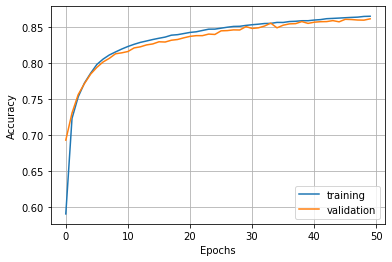

In [18]:
mlp_0001_acc = pd.DataFrame(mlp_0001.history)[['accuracy', 'val_accuracy']]
mlp_0001_acc.columns = ['training', 'validation']

mlp_0001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_0001.png')

In [19]:
# Learning rate = 0.01
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                        validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7242 - accuracy: 0.7634 - val_loss: 0.5317 - val_accuracy: 0.8083
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.8283 - val_loss: 0.4593 - val_accuracy: 0.8343
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4448 - accuracy: 0.8419 - val_loss: 0.4281 - val_accuracy: 0.8447
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4194 - accuracy: 0.8505 - val_loss: 0.4104 - val_accuracy: 0.8512
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8565 - val_loss: 0.4086 - val_accuracy: 0.8498
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3872 - accuracy: 0.8628 - val_loss: 0.4071 - val_accuracy: 0.8523
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8654 - val_loss: 0.3749 - val_accuracy:

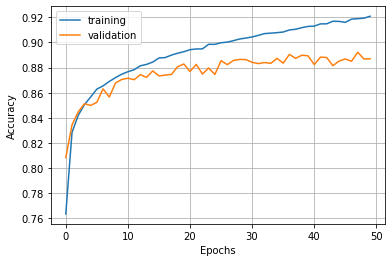

In [20]:
mlp_001_acc = pd.DataFrame(mlp_001.history)[['accuracy', 'val_accuracy']]
mlp_001_acc.columns = ['training', 'validation']

mlp_001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_001.png')

In [21]:
# Learning rate = 0.1
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_01 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                       validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 3s 1ms/step - loss: 0.5225 - accuracy: 0.8089 - val_loss: 0.5097 - val_accuracy: 0.8120
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4038 - accuracy: 0.8511 - val_loss: 0.3663 - val_accuracy: 0.8633
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3634 - accuracy: 0.8655 - val_loss: 0.3750 - val_accuracy: 0.8593
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8739 - val_loss: 0.3559 - val_accuracy: 0.8720
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3206 - accuracy: 0.8813 - val_loss: 0.3238 - val_accuracy: 0.8793
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.8871 - val_loss: 0.3492 - val_accuracy: 0.8698
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2920 - accuracy: 0.8915 - val_loss: 0.3548 - val_accuracy:

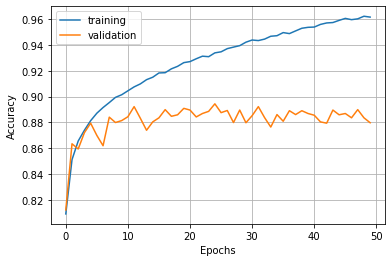

In [22]:
mlp_01_acc = pd.DataFrame(mlp_01.history)[['accuracy', 'val_accuracy']]
mlp_01_acc.columns = ['training', 'validation']

mlp_01_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_01.png')

Now let's see whether there would be any difference if we add one more hidden layer:

In [23]:
# Learning rate = 0.001
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.001)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_3l_0001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                            validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 3s 1ms/step - loss: 1.5957 - accuracy: 0.4915 - val_loss: 1.1374 - val_accuracy: 0.6553
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9688 - accuracy: 0.6983 - val_loss: 0.8580 - val_accuracy: 0.7213
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7877 - accuracy: 0.7432 - val_loss: 0.7383 - val_accuracy: 0.7500
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6944 - accuracy: 0.7710 - val_loss: 0.6655 - val_accuracy: 0.7792
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6334 - accuracy: 0.7910 - val_loss: 0.6150 - val_accuracy: 0.7915
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5909 - accuracy: 0.8012 - val_loss: 0.5787 - val_accuracy: 0.8008
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5594 - accuracy: 0.8096 - val_loss: 0.5505 - val_accuracy:

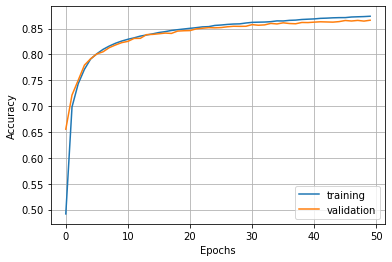

In [24]:
mlp_3l_0001_acc = pd.DataFrame(mlp_3l_0001.history)[['accuracy', 'val_accuracy']]
mlp_3l_0001_acc.columns = ['training', 'validation']

mlp_3l_0001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_3l_0001.png')

In [25]:
# Learning rate = 0.01
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_3l_001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                           validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7592 - accuracy: 0.7465 - val_loss: 0.5263 - val_accuracy: 0.8105
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4760 - accuracy: 0.8296 - val_loss: 0.4426 - val_accuracy: 0.8433
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4295 - accuracy: 0.8455 - val_loss: 0.4152 - val_accuracy: 0.8507
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4039 - accuracy: 0.8545 - val_loss: 0.4120 - val_accuracy: 0.8487
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3852 - accuracy: 0.8609 - val_loss: 0.3914 - val_accuracy: 0.8600
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3715 - accuracy: 0.8659 - val_loss: 0.3643 - val_accuracy: 0.8665
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3601 - accuracy: 0.8691 - val_loss: 0.3594 - val_accuracy:

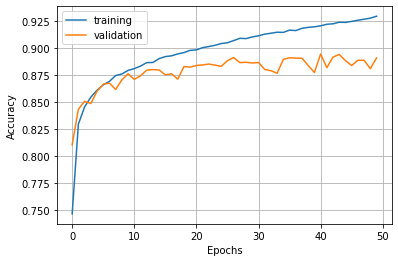

In [26]:
mlp_3l_001_acc = pd.DataFrame(mlp_3l_001.history)[['accuracy', 'val_accuracy']]
mlp_3l_001_acc.columns = ['training', 'validation']

mlp_3l_001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_3l_001.png')

In [27]:
# Learning rate = 0.1
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_3l_01 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                          validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5340 - accuracy: 0.8038 - val_loss: 0.6618 - val_accuracy: 0.7533
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3980 - accuracy: 0.8525 - val_loss: 0.3870 - val_accuracy: 0.8520
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.8674 - val_loss: 0.3449 - val_accuracy: 0.8738
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3307 - accuracy: 0.8767 - val_loss: 0.3445 - val_accuracy: 0.8708
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8834 - val_loss: 0.3312 - val_accuracy: 0.8772
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2971 - accuracy: 0.8881 - val_loss: 0.3319 - val_accuracy: 0.8728
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2850 - accuracy: 0.8923 - val_loss: 0.3520 - val_accuracy:

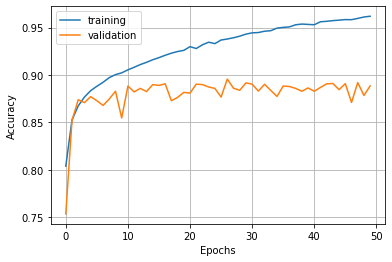

In [28]:
mlp_3l_01_acc = pd.DataFrame(mlp_3l_01.history)[['accuracy', 'val_accuracy']]
mlp_3l_01_acc.columns = ['training', 'validation']

mlp_3l_01_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_3l_01.png')

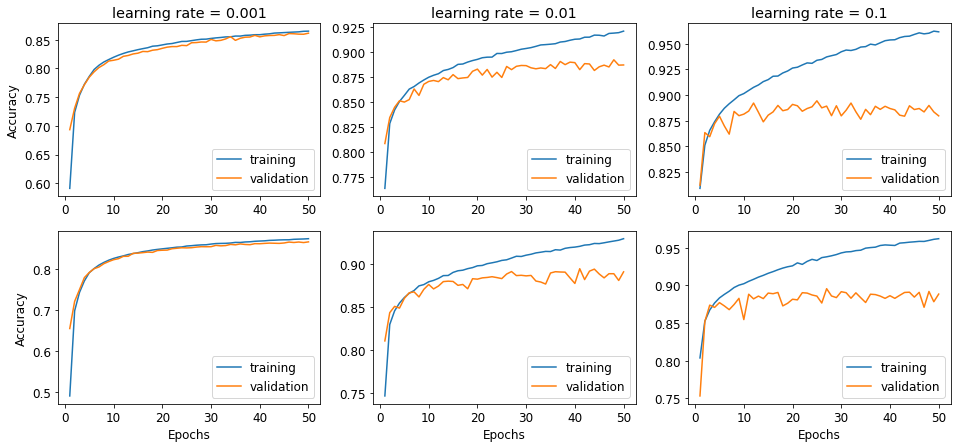

In [41]:
epochs = [i for i in range (1, 51)]
labels = ['training', 'validation']

plt.rcParams["figure.figsize"] = (16,7)
plt.rcParams.update({'font.size': 12})
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

ax1.plot(epochs, mlp_0001_acc['training'])
ax1.plot(epochs, mlp_0001_acc['validation'])
ax1.legend(labels = labels, loc = 'lower right')
ax1.set_title('learning rate = 0.001')
ax1.set(ylabel='Accuracy')

ax2.plot(epochs, mlp_001_acc['training'])
ax2.plot(epochs, mlp_001_acc['validation'])
ax2.legend(labels = labels, loc = 'lower right')
ax2.set_title('learning rate = 0.01')

ax3.plot(epochs, mlp_01_acc['training'])
ax3.plot(epochs, mlp_01_acc['validation'])
ax3.legend(labels = labels, loc = 'lower right')
ax3.set_title('learning rate = 0.1')

ax4.plot(epochs, mlp_3l_0001_acc['training'])
ax4.plot(epochs, mlp_3l_0001_acc['validation'])
ax4.legend(labels = labels, loc = 'lower right')
ax4.set(xlabel='Epochs', ylabel='Accuracy')

ax5.plot(epochs, mlp_3l_001_acc['training'])
ax5.plot(epochs, mlp_3l_001_acc['validation'])
ax5.legend(labels = labels, loc = 'lower right')
ax5.set(xlabel='Epochs')

ax6.plot(epochs, mlp_3l_01_acc['training'])
ax6.plot(epochs, mlp_3l_01_acc['validation'])
ax6.legend(labels = labels, loc = 'lower right')
ax6.set(xlabel='Epochs')

plt.savefig('MLP_number_of_hidden_layers.png', bbox_inches = 'tight')
plt.show()

The figure above summarizes the accuracy changes of the training and validation set under different learning rates. The upper row are the results with two hidden layers, and the lower row are the ones with three hidden layers.

It shows that the accuracy score seems to reach a limit after 10 epochs regardless of the learning rate. Hence, we can choose 10 epochs to be the final running time for our MLP model. On the other hand, since there is no siginificant difference  between the two models, we can say that two hidden layers is already enough to handle this classification task for MLP.

We also conducted some tests to inspect the effect of dropout on the model performance by adding a dropout layer with a rate of 0.5 after each hidden layer.

In [31]:
# Learning rate = 0.001
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.001)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_dropout_0001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                                 validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 1.6849 - accuracy: 0.3923 - val_loss: 1.0672 - val_accuracy: 0.6550
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1530 - accuracy: 0.5909 - val_loss: 0.8561 - val_accuracy: 0.6972
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9862 - accuracy: 0.6514 - val_loss: 0.7601 - val_accuracy: 0.7273
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9013 - accuracy: 0.6787 - val_loss: 0.7040 - val_accuracy: 0.7485
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8392 - accuracy: 0.7031 - val_loss: 0.6597 - val_accuracy: 0.7667
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7927 - accuracy: 0.7223 - val_loss: 0.6292 - val_accuracy: 0.7735
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7633 - accuracy: 0.7316 - val_loss: 0.6044 - val_accuracy:

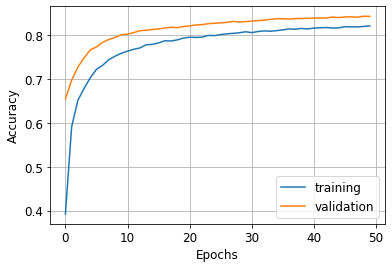

In [32]:
mlp_dropout_0001_acc = pd.DataFrame(mlp_dropout_0001.history)[['accuracy', 'val_accuracy']]
mlp_dropout_0001_acc.columns = ['training', 'validation']

mlp_dropout_0001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_dropout_0001.png')

In [33]:
# Learning rate = 0.01
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_dropout_001 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                                validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.9408 - accuracy: 0.6680 - val_loss: 0.5694 - val_accuracy: 0.7902
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6442 - accuracy: 0.7735 - val_loss: 0.4995 - val_accuracy: 0.8207
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5891 - accuracy: 0.7943 - val_loss: 0.4701 - val_accuracy: 0.8297
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5626 - accuracy: 0.8062 - val_loss: 0.4555 - val_accuracy: 0.8362
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5428 - accuracy: 0.8104 - val_loss: 0.4446 - val_accuracy: 0.8415
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5304 - accuracy: 0.8157 - val_loss: 0.4321 - val_accuracy: 0.8452
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5164 - accuracy: 0.8226 - val_loss: 0.4357 - val_accuracy:

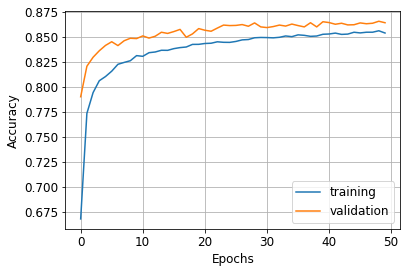

In [36]:
mlp_dropout_001_acc = pd.DataFrame(mlp_dropout_001.history)[['accuracy', 'val_accuracy']]
mlp_dropout_001_acc.columns = ['training', 'validation']

mlp_dropout_001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_dropout_001.png')

In [37]:
# Learning rate = 0.1
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_dropout_01 = mlp_model.fit(X_train_train, y_train_train, epochs=50,
                               validation_data=(X_train_valid, y_train_valid))

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7115 - accuracy: 0.7440 - val_loss: 0.4944 - val_accuracy: 0.8203
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5657 - accuracy: 0.7991 - val_loss: 0.4987 - val_accuracy: 0.8168
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5300 - accuracy: 0.8146 - val_loss: 0.4290 - val_accuracy: 0.8408
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5121 - accuracy: 0.8203 - val_loss: 0.4351 - val_accuracy: 0.8368
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8276 - val_loss: 0.4199 - val_accuracy: 0.8425
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4873 - accuracy: 0.8293 - val_loss: 0.4118 - val_accuracy: 0.8522
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4839 - accuracy: 0.8321 - val_loss: 0.4079 - val_accuracy:

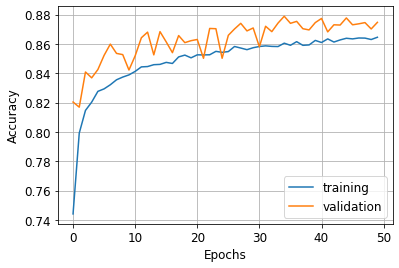

In [38]:
mlp_dropout_01_acc = pd.DataFrame(mlp_dropout_01.history)[['accuracy', 'val_accuracy']]
mlp_dropout_01_acc.columns = ['training', 'validation']

mlp_dropout_01_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('mlp_dropout_01.png')

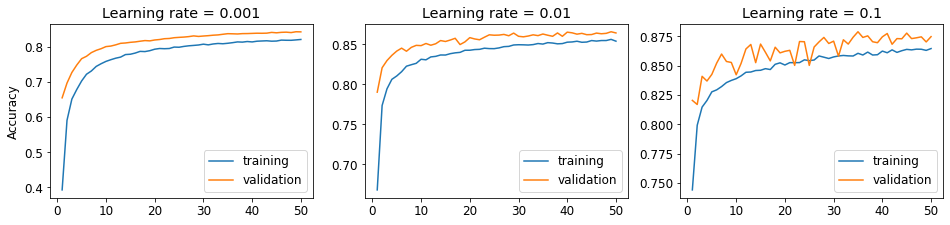

In [39]:
epochs = [i for i in range (1, 51)]
labels = ['training', 'validation']

plt.rcParams["figure.figsize"] = (16, 3.2)
plt.rcParams.update({'font.size': 12})
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3)

ax1.plot(epochs, mlp_dropout_0001_acc['training'])
ax1.plot(epochs, mlp_dropout_0001_acc['validation'])
ax1.legend(labels = labels, loc = 'lower right')
ax1.set_title('Learning rate = 0.001')
ax1.set(ylabel='Accuracy')

ax2.plot(epochs, mlp_dropout_001_acc['training'])
ax2.plot(epochs, mlp_dropout_001_acc['validation'])
ax2.legend(labels = labels, loc = 'lower right')
ax2.set_title('Learning rate = 0.01')

ax3.plot(epochs, mlp_dropout_01_acc['training'])
ax3.plot(epochs, mlp_dropout_01_acc['validation'])
ax3.legend(labels = labels, loc = 'lower right')
ax3.set_title('Learning rate = 0.1')

plt.savefig('MLP_dropout.png', bbox_inches = 'tight')
plt.show()

According to the result, the overall performance of MLP does not improve much after dropout is introduced. As a result, we can retain our original MLP structure.

In [51]:
# Final MLP structure for hyperparameter tuning
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt,
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(X_train_train, y_train_train, epochs=10,
                            validation_data=(X_train_valid, y_train_valid))

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5255 - accuracy: 0.8087 - val_loss: 0.4319 - val_accuracy: 0.8378
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4021 - accuracy: 0.8516 - val_loss: 0.3700 - val_accuracy: 0.8595
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3637 - accuracy: 0.8663 - val_loss: 0.4676 - val_accuracy: 0.8388
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.8736 - val_loss: 0.3420 - val_accuracy: 0.8728
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3205 - accuracy: 0.8797 - val_loss: 0.3452 - val_accuracy: 0.8740
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3053 - accuracy: 0.8863 - val_loss: 0.3565 - val_accuracy: 0.8678
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.8892 - val_loss: 0.3373 - val_accuracy:

In [52]:
# Evaluate the model performance on the test data
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print('MLP accuracy on test data: {:.4f}'.format(mlp_accuracy))

313/313 [==============================] - 0s 838us/step - loss: 0.3414 - accuracy: 0.8781
MLP accuracy on test data: 0.8781


1/1 [==============================] - 0s 36ms/step


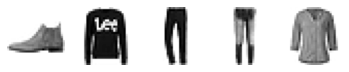

True class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Predicted class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


In [53]:
# Output sample test results
y_proba = mlp_model.predict(X_test[:5])
y_pred = np.argmax(y_proba, axis=1)
pred_class = [class_names[i] for i in y_pred]
true_class = [class_names[i] for i in y_test[:5]]
plot_examples(X_test, n_rows=1, n_cols=5)
print('True class: {}'.format(true_class))
print('Predicted class: {}'.format(pred_class))

### 2.3 Convolutional neural network

The basic structure of our CNN model is shown by the following code. Only two CONV-POOL-RELU blocks are used in this model as they are already enough for our classfication task. However, again, it is important for us to choose an appropriate number of epochs for running the CNN model.

In [14]:
cnn_model = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'), 
])

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

In [16]:
# Learning rate = 0.001
cnn_0001 = cnn_model.fit(X_train_train_cnn, y_train_train,
                         batch_size=128, epochs=30,
                         validation_data=(X_train_valid_cnn, y_train_valid))

Epoch 1/30
422/422 [==============================] - 17s 37ms/step - loss: 0.6309 - accuracy: 0.7725 - val_loss: 0.4323 - val_accuracy: 0.8447
Epoch 2/30
422/422 [==============================] - 17s 40ms/step - loss: 0.4144 - accuracy: 0.8532 - val_loss: 0.3462 - val_accuracy: 0.8755
Epoch 3/30
422/422 [==============================] - 15s 35ms/step - loss: 0.3689 - accuracy: 0.8699 - val_loss: 0.3189 - val_accuracy: 0.8840
Epoch 4/30
422/422 [==============================] - 15s 35ms/step - loss: 0.3379 - accuracy: 0.8801 - val_loss: 0.2966 - val_accuracy: 0.8930
Epoch 5/30
422/422 [==============================] - 15s 36ms/step - loss: 0.3189 - accuracy: 0.8859 - val_loss: 0.2917 - val_accuracy: 0.8938
Epoch 6/30
422/422 [==============================] - 15s 36ms/step - loss: 0.3033 - accuracy: 0.8925 - val_loss: 0.2713 - val_accuracy: 0.9027
Epoch 7/30
422/422 [==============================] - 15s 36ms/step - loss: 0.2916 - accuracy: 0.8966 - val_loss: 0.2602 - val_accuracy:

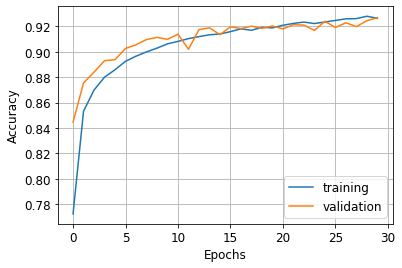

In [17]:
cnn_0001_acc = pd.DataFrame(cnn_0001.history)[['accuracy', 'val_accuracy']]
cnn_0001_acc.columns = ['training', 'validation']

cnn_0001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('cnn_0001.png')

In [21]:
# Learning rate = 0.01
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'), 
])
opt = keras.optimizers.Adam(learning_rate=0.01)
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

cnn_001 = cnn_model.fit(X_train_train_cnn, y_train_train,
                        batch_size=128, epochs=30,
                        validation_data=(X_train_valid_cnn, y_train_valid))

Epoch 1/30
422/422 [==============================] - 15s 36ms/step - loss: 0.4898 - accuracy: 0.8233 - val_loss: 0.3396 - val_accuracy: 0.8758
Epoch 2/30
422/422 [==============================] - 15s 35ms/step - loss: 0.3733 - accuracy: 0.8646 - val_loss: 0.3290 - val_accuracy: 0.8857
Epoch 3/30
422/422 [==============================] - 15s 35ms/step - loss: 0.3453 - accuracy: 0.8740 - val_loss: 0.2845 - val_accuracy: 0.8970
Epoch 4/30
422/422 [==============================] - 15s 35ms/step - loss: 0.3333 - accuracy: 0.8804 - val_loss: 0.3064 - val_accuracy: 0.8888
Epoch 5/30
422/422 [==============================] - 15s 36ms/step - loss: 0.3233 - accuracy: 0.8820 - val_loss: 0.2794 - val_accuracy: 0.8975
Epoch 6/30
422/422 [==============================] - 15s 37ms/step - loss: 0.3187 - accuracy: 0.8850 - val_loss: 0.2818 - val_accuracy: 0.8960
Epoch 7/30
422/422 [==============================] - 16s 38ms/step - loss: 0.3184 - accuracy: 0.8819 - val_loss: 0.2999 - val_accuracy:

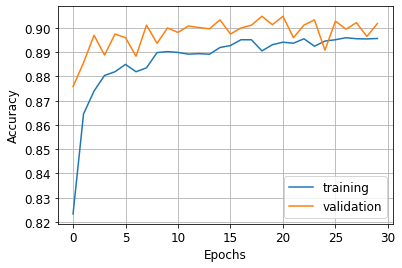

In [22]:
cnn_001_acc = pd.DataFrame(cnn_001.history)[['accuracy', 'val_accuracy']]
cnn_001_acc.columns = ['training', 'validation']

cnn_001_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('cnn_001.png')

In [18]:
# Learning rate = 0.1
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'), 
])
opt = keras.optimizers.Adam(learning_rate=0.1)
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

cnn_01 = cnn_model.fit(X_train_train_cnn, y_train_train,
                       batch_size=128, epochs=30,
                       validation_data=(X_train_valid_cnn, y_train_valid))

Epoch 1/30
422/422 [==============================] - 16s 37ms/step - loss: 2.5810 - accuracy: 0.1006 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 2/30
422/422 [==============================] - 15s 36ms/step - loss: 2.3082 - accuracy: 0.0991 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 3/30
422/422 [==============================] - 15s 35ms/step - loss: 2.3082 - accuracy: 0.0983 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 4/30
422/422 [==============================] - 15s 35ms/step - loss: 2.3086 - accuracy: 0.0999 - val_loss: 2.3125 - val_accuracy: 0.1000
Epoch 5/30
422/422 [==============================] - 15s 34ms/step - loss: 2.3088 - accuracy: 0.0995 - val_loss: 2.3089 - val_accuracy: 0.1000
Epoch 6/30
422/422 [==============================] - 15s 35ms/step - loss: 2.3090 - accuracy: 0.1002 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 7/30
422/422 [==============================] - 15s 36ms/step - loss: 2.3089 - accuracy: 0.0986 - val_loss: 2.3073 - val_accuracy:

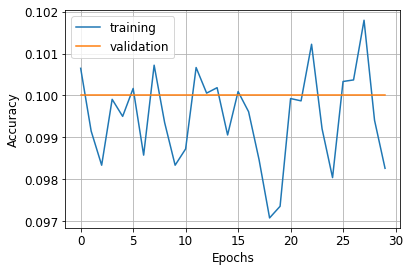

In [19]:
cnn_01_acc = pd.DataFrame(cnn_01.history)[['accuracy', 'val_accuracy']]
cnn_01_acc.columns = ['training', 'validation']

cnn_01_acc.plot(figsize = (6, 4))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('cnn_01.png')

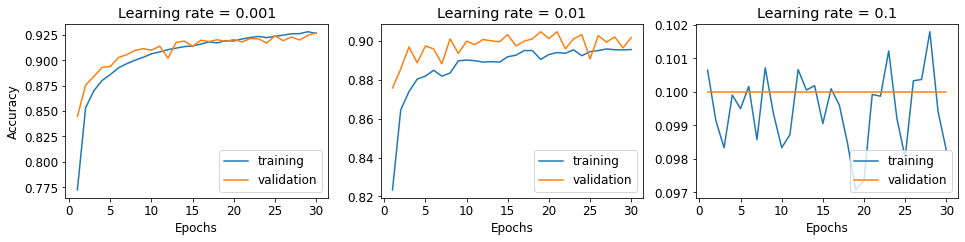

In [24]:
epochs = [i for i in range (1, 31)]
labels = ['training', 'validation']

plt.rcParams["figure.figsize"] = (16,3.2)
plt.rcParams.update({'font.size': 12})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(epochs, cnn_0001_acc['training'])
ax1.plot(epochs, cnn_0001_acc['validation'])
ax1.legend(labels = labels, loc = 'lower right')
ax1.set_title('Learning rate = 0.001')
ax1.set(xlabel='Epochs', ylabel='Accuracy')

ax2.plot(epochs, cnn_001_acc['training'])
ax2.plot(epochs, cnn_001_acc['validation'])
ax2.legend(labels = labels, loc = 'lower right')
ax2.set_title('Learning rate = 0.01')
ax2.set(xlabel='Epochs')

ax3.plot(epochs, cnn_01_acc['training'])
ax3.plot(epochs, cnn_01_acc['validation'])
ax3.legend(labels = labels, loc = 'lower right')
ax3.set_title('Learning rate = 0.1')
ax3.set(xlabel='Epochs')

plt.savefig('CNN.png', bbox_inches = 'tight')
plt.show()

Similar to the results of MLP, the validation accuracy of CNN almost remains unchanged after 10 epochs. Therefore, the running time for CNN is set to be 10 epochs as well.

In [57]:
# Final CNN structure for hyperparameter tuning
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'), 
])
opt = keras.optimizers.Adam(learning_rate=0.01)
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_train_cnn, y_train_train,
                            batch_size=128, epochs=10,
                            validation_data=(X_train_valid_cnn, y_train_valid))

Epoch 1/10
422/422 [==============================] - 17s 39ms/step - loss: 0.5430 - accuracy: 0.8013 - val_loss: 0.3586 - val_accuracy: 0.8675
Epoch 2/10
422/422 [==============================] - 16s 37ms/step - loss: 0.4040 - accuracy: 0.8526 - val_loss: 0.3369 - val_accuracy: 0.8727
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 0.3782 - accuracy: 0.8613 - val_loss: 0.3343 - val_accuracy: 0.8787
Epoch 4/10
422/422 [==============================] - 16s 37ms/step - loss: 0.3712 - accuracy: 0.8635 - val_loss: 0.3084 - val_accuracy: 0.8858
Epoch 5/10
422/422 [==============================] - 17s 41ms/step - loss: 0.3593 - accuracy: 0.8691 - val_loss: 0.3097 - val_accuracy: 0.8830
Epoch 6/10
422/422 [==============================] - 15s 36ms/step - loss: 0.3525 - accuracy: 0.8701 - val_loss: 0.3079 - val_accuracy: 0.8900
Epoch 7/10
422/422 [==============================] - 16s 38ms/step - loss: 0.3496 - accuracy: 0.8711 - val_loss: 0.2951 - val_accuracy:

In [58]:
# Evaluate the model perfromance on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print('CNN accuracy on test data: {:.4f}'.format(cnn_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.8861
Accuracy on test data: 0.8861


1/1 [==============================] - 0s 73ms/step


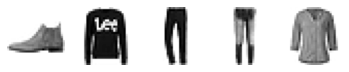

True class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Predicted class: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


In [59]:
# Output sample test results
y_proba = cnn_model.predict(X_test_cnn[:5])
y_pred = np.argmax(y_proba, axis=1)
pred_class = [class_names[i] for i in y_pred]
true_class = [class_names[i] for i in y_test[:5]]
plot_examples(X_test, n_rows=1, n_cols=5)
print('True class: {}'.format(true_class))
print('Predicted class: {}'.format(pred_class))

## 3. Hyperparameter tuning

In this section, we will tune the three estimators using GirdSearch to find the best combination of the hyperparameters for each.

### 3.1 Algorithm of choice from first six weeks of course

For random forest, the hyperparameters to be tuned include:
1. **n_estimators:** the number of trees
2. **max_depth:** the maximum depth of the tree

However, due to the time limit, we use the holdout method with only one validation set to implement the grid search instead of cross-validation.

In [19]:
# Set the training and validation set for one-holdout method
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

In [20]:
n_estimators = [10, 50, 100, 500, 1000]
max_depth = [10, 20, 30, 40, 50]

RF_param = {'': n_estimators,
            'max_depth': max_depth}

RF = RandomForestClassifier(criterion='entropy', random_state=0)
rf_gs = GridSearchCV(RF, RF_param, cv=sss, return_train_score=True)
rf_gs.fit(X_train_rf, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None),
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             return_train_score=True)

In [21]:
print("RF best number of trees: {}".format(rf_gs.best_params_['n_estimators']))
print("RF best maximum depth of trees: {}".format(rf_gs.best_params_['max_depth']))
print("RF best cross-validation accuracy: {:.4f}".format(rf_gs.best_score_))
print("RF test set accuracy: {:.4f}".format(rf_gs.score(X_test_rf, y_test)))

RF best number of trees: 1000
RF best maximum depth of trees: 30
RF best cross-validation accuracy: 0.8857
RF test set accuracy: 0.8779


In [23]:
# Output the hyperparameter tuning results
rf_gs_res = {
    'n_estimators': [rf_gs.cv_results_['params'][i]['n_estimators'] for i in range(len(rf_gs.cv_results_['params']))],
    'max_depth': [rf_gs.cv_results_['params'][i]['max_depth'] for i in range(len(rf_gs.cv_results_['params']))],
    'runtime': rf_gs.cv_results_['mean_fit_time'] + rf_gs.cv_results_['mean_score_time'],
    'mean test score': rf_gs.cv_results_['mean_test_score']
}

rf_df = pd.DataFrame(rf_gs_res)
rf_df

,n_estimators,max_depth,runtime,mean test score
0,10,10,10.314455,0.843500
1,50,10,26.365417,0.850333
2,100,10,42.319702,0.853667
3,500,10,200.031373,0.855667
4,1000,10,407.803413,0.854167
5,10,20,9.967663,0.856500
6,50,20,33.071566,0.880500
7,100,20,65.501734,0.882833
8,500,20,311.872413,0.884167
9,1000,20,607.027149,0.884333


### 3.2 Fully connected neural network

For MLP, three parameters would be tuned in this section to investigate the effect of model complexity, activation type, and learning rate on the final prediction results:

1. **n_hidden_neurons:** the number of neurons in the hidden layer
2. **acitvation_function:** the activation function used for the neurons in the hidden layer
3. **optimizer_lr:** the learning rate of the neural network

Since the hyperparameter tuning of neural netowrks could be run more efficiently based on GPU, we use 3-fold cross validation method for the MLP and the following CNN model.

In [8]:
def build_mlp(n_hidden_layers, n_hidden_neurons, activation_function, optimizer_lr):
    
    model = keras.models.Sequential()
        
    model.add(keras.layers.Flatten(input_shape=[28, 28]))

    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation='tanh'))
        
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    opt = keras.optimizers.SGD(learning_rate=optimizer_lr)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [9]:
# Create a KerasClassifier object which works with sklearn grid searches
mlp_keras_classifier = KerasClassifier(build_mlp,
                                       n_hidden_layers=2,
                                       n_hidden_neurons=100,
                                       activation_function='tanh',
                                       optimizer_lr=0.1,
                                       epochs=10)

In [17]:
mlp_param = {
    'n_hidden_neurons': [100, 300, 500],
    'optimizer_lr': [0.1, 0.01, 0.001],
    'activation_function': [None, 'tanh', 'relu']
}

mlp_gs = GridSearchCV(mlp_keras_classifier, mlp_param, cv=3, verbose=2)
mlp_gs.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] optimizer_lr=0.1, activation_function=None, n_hidden_neurons=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
40000/40000 [==============================] - 7s 175us/step - loss: 0.5467 - acc: 0.8001
Epoch 2/10
40000/40000 [==============================] - 3s 87us/step - loss: 0.4157 - acc: 0.8487
Epoch 3/10
40000/40000 [==============================] - 4s 89us/step - loss: 0.3783 - acc: 0.8622
Epoch 4/10
40000/40000 [==============================] - 3s 77us/step - loss: 0.3491 - acc: 0.8704
Epoch 5/10
40000/40000 [==============================] - 3s 71us/step - loss: 0.3282 - acc: 0.8791
Epoch 6/10
40000/40000 [==============================] - 3s 74us/step - loss: 0.3151 - acc: 0.8842
Epoch 7/10
40000/40000 [==============================] - 3s 71us/step - loss: 0.3016 - acc: 0.8874
Epoch 8/10
40000/40000 [==============================] - 3s 69us/step - loss: 0.2878 - acc: 0.8928
Epoch 9/10
40000/40000 [==============================] - 3s 69us/step - loss: 0.2786 - acc: 0.8963
Epoch 10/10
20000/20000 [==============================] - 1s 35us/step
[CV]  optimizer_lr=0.1, act

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.5s remaining:    0.0s


Epoch 1/10
40000/40000 [==============================] - 3s 76us/step - loss: 0.5542 - acc: 0.7971
Epoch 2/10
40000/40000 [==============================] - 3s 69us/step - loss: 0.4229 - acc: 0.8441
Epoch 3/10
40000/40000 [==============================] - 3s 64us/step - loss: 0.3829 - acc: 0.8577
Epoch 4/10
40000/40000 [==============================] - 3s 64us/step - loss: 0.3549 - acc: 0.8685
Epoch 5/10
40000/40000 [==============================] - 3s 64us/step - loss: 0.3373 - acc: 0.8765
Epoch 6/10
40000/40000 [==============================] - 3s 86us/step - loss: 0.3204 - acc: 0.8792
Epoch 7/10
40000/40000 [==============================] - 4s 106us/step - loss: 0.3062 - acc: 0.8854
Epoch 8/10
40000/40000 [==============================] - 5s 127us/step - loss: 0.2916 - acc: 0.8907
Epoch 9/10
40000/40000 [==============================] - 6s 145us/step - loss: 0.2836 - acc: 0.8944 0s - loss: 0.2840 - acc: 
Epoch 10/10
20000/20000 [==============================] - 1s 36us/step

40000/40000 [==============================] - 3s 70us/step - loss: 0.4133 - acc: 0.8537
Epoch 6/10
40000/40000 [==============================] - 3s 70us/step - loss: 0.4012 - acc: 0.8585
Epoch 7/10
40000/40000 [==============================] - 3s 70us/step - loss: 0.3911 - acc: 0.8604
Epoch 8/10
40000/40000 [==============================] - 3s 72us/step - loss: 0.3816 - acc: 0.8648
Epoch 9/10
40000/40000 [==============================] - 3s 70us/step - loss: 0.3752 - acc: 0.8658
Epoch 10/10
20000/20000 [==============================] - 1s 41us/step
[CV]  optimizer_lr=0.01, activation_function=None, n_hidden_neurons=300, total=  30.6s
[CV] optimizer_lr=0.001, activation_function=None, n_hidden_neurons=300 
Epoch 1/10
40000/40000 [==============================] - 4s 102us/step - loss: 1.3222 - acc: 0.6133
Epoch 2/10
40000/40000 [==============================] - 5s 117us/step - loss: 0.8368 - acc: 0.7318
Epoch 3/10
40000/40000 [==============================] - 6s 144us/step - los

40000/40000 [==============================] - 4s 89us/step - loss: 0.2942 - acc: 0.8922
Epoch 9/10
40000/40000 [==============================] - 3s 83us/step - loss: 0.2838 - acc: 0.8953
Epoch 10/10
20000/20000 [==============================] - 1s 50us/step
[CV]  optimizer_lr=0.1, activation_function=tanh, n_hidden_neurons=100, total=  41.0s
[CV] optimizer_lr=0.1, activation_function=tanh, n_hidden_neurons=100 
Epoch 1/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.5577 - acc: 0.7962
Epoch 2/10
40000/40000 [==============================] - 3s 78us/step - loss: 0.4229 - acc: 0.8450
Epoch 3/10
40000/40000 [==============================] - 3s 77us/step - loss: 0.3829 - acc: 0.8588
Epoch 4/10
40000/40000 [==============================] - 3s 74us/step - loss: 0.3546 - acc: 0.8684
Epoch 5/10
40000/40000 [==============================] - 3s 69us/step - loss: 0.3368 - acc: 0.8763
Epoch 6/10
40000/40000 [==============================] - 3s 69us/step - loss: 0.3

Epoch 1/10
40000/40000 [==============================] - 4s 96us/step - loss: 0.7071 - acc: 0.7679
Epoch 2/10
40000/40000 [==============================] - 3s 75us/step - loss: 0.4953 - acc: 0.8272
Epoch 3/10
40000/40000 [==============================] - 4s 97us/step - loss: 0.4540 - acc: 0.8403
Epoch 4/10
40000/40000 [==============================] - 5s 116us/step - loss: 0.4299 - acc: 0.8506
Epoch 5/10
40000/40000 [==============================] - 7s 178us/step - loss: 0.4139 - acc: 0.8546
Epoch 6/10
40000/40000 [==============================] - 6s 138us/step - loss: 0.3997 - acc: 0.8588
Epoch 7/10
40000/40000 [==============================] - 4s 100us/step - loss: 0.3904 - acc: 0.8622
Epoch 8/10
40000/40000 [==============================] - 3s 86us/step - loss: 0.3807 - acc: 0.8662
Epoch 9/10
40000/40000 [==============================] - 3s 86us/step - loss: 0.3729 - acc: 0.8680
Epoch 10/10
20000/20000 [==============================] - 1s 59us/step
[CV]  optimizer_lr=0.01,

40000/40000 [==============================] - 4s 88us/step - loss: 0.3355 - acc: 0.8763
Epoch 6/10
40000/40000 [==============================] - 3s 81us/step - loss: 0.3197 - acc: 0.8817
Epoch 7/10
40000/40000 [==============================] - 3s 81us/step - loss: 0.3051 - acc: 0.8879
Epoch 8/10
40000/40000 [==============================] - 3s 84us/step - loss: 0.2932 - acc: 0.8904
Epoch 9/10
40000/40000 [==============================] - 3s 82us/step - loss: 0.2835 - acc: 0.8942
Epoch 10/10
20000/20000 [==============================] - 1s 62us/step
[CV]  optimizer_lr=0.1, activation_function=relu, n_hidden_neurons=100, total=  43.6s
[CV] optimizer_lr=0.1, activation_function=relu, n_hidden_neurons=100 
Epoch 1/10
40000/40000 [==============================] - 4s 103us/step - loss: 0.5521 - acc: 0.7984
Epoch 2/10
40000/40000 [==============================] - 3s 73us/step - loss: 0.4221 - acc: 0.8450
Epoch 3/10
40000/40000 [==============================] - 3s 74us/step - loss: 0.

40000/40000 [==============================] - 4s 106us/step - loss: 1.5254 - acc: 0.5376
Epoch 2/10
40000/40000 [==============================] - 3s 74us/step - loss: 0.9932 - acc: 0.6930
Epoch 3/10
40000/40000 [==============================] - 3s 84us/step - loss: 0.8315 - acc: 0.7307
Epoch 4/10
40000/40000 [==============================] - 5s 124us/step - loss: 0.7468 - acc: 0.7539
Epoch 5/10
40000/40000 [==============================] - 7s 176us/step - loss: 0.6921 - acc: 0.7695
Epoch 6/10
40000/40000 [==============================] - 6s 139us/step - loss: 0.6527 - acc: 0.7816
Epoch 7/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.6221 - acc: 0.7907
Epoch 8/10
40000/40000 [==============================] - 4s 90us/step - loss: 0.5976 - acc: 0.7985
Epoch 9/10
40000/40000 [==============================] - 3s 83us/step - loss: 0.5775 - acc: 0.8045
Epoch 10/10
20000/20000 [==============================] - 1s 73us/step
[CV]  optimizer_lr=0.001, activatio

40000/40000 [==============================] - 4s 88us/step - loss: 0.3523 - acc: 0.8699
Epoch 6/10
40000/40000 [==============================] - 4s 96us/step - loss: 0.3309 - acc: 0.8776
Epoch 7/10
40000/40000 [==============================] - 3s 86us/step - loss: 0.3149 - acc: 0.8828
Epoch 8/10
40000/40000 [==============================] - 3s 85us/step - loss: 0.3053 - acc: 0.8855
Epoch 9/10
40000/40000 [==============================] - 4s 92us/step - loss: 0.2915 - acc: 0.8905
Epoch 10/10
20000/20000 [==============================] - 3s 134us/step
[CV]  optimizer_lr=0.1, activation_function=relu, n_hidden_neurons=500, total=  43.3s
[CV] optimizer_lr=0.01, activation_function=relu, n_hidden_neurons=500 
Epoch 1/10
40000/40000 [==============================] - 9s 232us/step - loss: 0.6826 - acc: 0.7753
Epoch 2/10
40000/40000 [==============================] - 4s 105us/step - loss: 0.4854 - acc: 0.8324
Epoch 3/10
40000/40000 [==============================] - 4s 101us/step - loss

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 54.8min finished


Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.5239 - acc: 0.8110
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.4069 - acc: 0.8504
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3657 - acc: 0.8651
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3403 - acc: 0.8747
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3193 - acc: 0.8807
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3044 - acc: 0.8868
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2914 - acc: 0.8911
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2780 - acc: 0.8962
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2691 - acc: 0.8986
Epoch 10/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.2596 - acc: 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000017DF36BB2B0>,
             iid='warn', n_jobs=None,
             param_grid={'activation_function': [None, 'tanh', 'relu'],
                         'n_hidden_neurons': [100, 300, 500],
                         'optimizer_lr': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [24]:
mlp_test_score = mlp_gs.score(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


In [26]:
print("MLP best number of hidden neurons: {}".format(mlp_gs.best_params_['n_hidden_neurons']))
print("MLP best learning rate: {}".format(mlp_gs.best_params_['optimizer_lr']))
print("MLP best activation function: {}".format(mlp_gs.best_params_['activation_function']))
print("MLP best cross-validation accuracy: {:.4f}".format(mlp_gs.best_score_))
print("MLP test set accuracy: {:.4f}".format(mlp_test_score))

MLP best number of hidden neurons: 300
MLP best learning rate: 0.1
MLP best activation function: tanh
MLP best cross-validation accuracy: 0.8809
MLP test set accuracy: 0.8821


In [27]:
# Output the hyperparameter tuning results
mlp_gs_res = {
    'n_hidden_neurons': [mlp_gs.cv_results_['params'][i]['n_hidden_neurons'] for i in range(len(mlp_gs.cv_results_['params']))],
    'optimizer_lr': [mlp_gs.cv_results_['params'][i]['optimizer_lr'] for i in range(len(mlp_gs.cv_results_['params']))],
    'activation_function': [mlp_gs.cv_results_['params'][i]['activation_function'] for i in range(len(mlp_gs.cv_results_['params']))],
    'runtime': mlp_gs.cv_results_['mean_fit_time'] + mlp_gs.cv_results_['mean_score_time'],
    'mean test score': mlp_gs.cv_results_['mean_test_score']
}

mlp_df = pd.DataFrame(mlp_gs_res)
mlp_df[['n_hidden_neurons', 'optimizer_lr', 'activation_function', 'runtime', 'mean test score']]

,n_hidden_neurons,optimizer_lr,activation_function,runtime,mean test score
0,100,0.100,None,33.729058,0.878183
1,100,0.010,None,35.414009,0.863717
2,100,0.001,None,36.443502,0.812733
3,300,0.100,None,34.979160,0.872250
4,300,0.010,None,35.300853,0.860133
5,300,0.001,None,36.636510,0.822383
6,500,0.100,None,40.106247,0.878083
7,500,0.010,None,39.141903,0.855167
8,500,0.001,None,41.393560,0.826167
9,100,0.100,tanh,37.439884,0.878517


### 3.3 Convolutional neural network

For CNN, the hyperparameters that would be tuned are listed as follows:

1. **kernel_size:** the size of the kernel used in the convolution layer
2. **strides:** the stride of the kernel used in the convolution layer
3. **optimizer_lr:** the learning rate of the neural network

In [24]:
def build_cnn(kernel_size, strides, optimizer_lr):
    
    model = keras.models.Sequential()
    
    model.add(keras.Input(shape=(28, 28, 1)))
    
    model.add(keras.layers.Conv2D(32, kernel_size=kernel_size,
                                  strides=strides, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'))
    model.add(keras.layers.Conv2D(64, kernel_size=kernel_size,
                                  strides=strides, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    opt = keras.optimizers.Adam(learning_rate=optimizer_lr)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [25]:
# Create a KerasClassifier object which works with sklearn grid searches
cnn_keras_classifier = KerasClassifier(build_cnn,
                                       kernel_size=(3, 3),
                                       strides =(1, 1),
                                       optimizer_lr=0.01,
                                       batch_size=128,
                                       epochs=10)

In [26]:
cnn_param = {
    'kernel_size': [(3, 3), (5, 5)],
    'strides': [(1, 1), (2, 2)],
    'optimizer_lr': [0.1, 0.01, 0.001]
}

cnn_gs = GridSearchCV(cnn_keras_classifier, cnn_param, cv=3, verbose=2)
cnn_gs.fit(X_train_cnn, y_train)
cnn_test_score = cnn_gs.score(X_test_cnn, y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1/10
313/313 [==============================] - 12s 37ms/step - loss: 1.3729 - accuracy: 0.6395
Epoch 2/10
313/313 [==============================] - 11s 36ms/step - loss: 0.8558 - accuracy: 0.6760
Epoch 3/10
313/313 [==============================] - 11s 35ms/step - loss: 0.8365 - accuracy: 0.6878
Epoch 4/10
313/313 [==============================] - 11s 37ms/step - loss: 0.8234 - accuracy: 0.6906
Epoch 5/10
313/313 [==============================] - 12s 37ms/step - loss: 0.8205 - accuracy: 0.6945
Epoch 6/10
313/313 [==============================] - 11s 36ms/step - loss: 0.8450 - accuracy: 0.6872
Epoch 7/10
313/313 [==============================] - 11s 34ms/step - loss: 0.9480 - accuracy: 0.6438
Epoch 8/10
313/313 [==============================] - 11s 36ms/step - loss: 0.9185 - accuracy: 0.6603
Epoch 9/10
313/313 [==============================] - 11s 37ms/step - loss: 0.9056 - accuracy: 0.6662
Epoch 10/10
157/157 [

313/313 [==============================] - 3s 8ms/step - loss: 0.4120 - accuracy: 0.8476
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8856
[CV] END kernel_size=(3, 3), n_strides=(2, 2), optimizer_lr=0.01; total time=  27.2s
Epoch 1/10
313/313 [==============================] - 3s 8ms/step - loss: 0.7312 - accuracy: 0.7292
Epoch 2/10
313/313 [==============================] - 2s 8ms/step - loss: 0.5254 - accuracy: 0.8075
Epoch 3/10
313/313 [==============================] - 3s 8ms/step - loss: 0.4778 - accuracy: 0.8242
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 0.4614 - accuracy: 0.8309
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 0.4461 - accuracy: 0.8366
Epoch 6/10
313/313 [==============================] - 2s 8ms/step - loss: 0.4330 - accuracy: 0.8403
Epoch 7/10
313/313 [==============================] - 3s 8ms/step - loss: 0.4235 - accuracy: 0.8425
Epoch 8/10
313/313 [=====

313/313 [==============================] - 2s 7ms/step - loss: 1.0485 - accuracy: 0.6287
Epoch 7/10
313/313 [==============================] - 2s 8ms/step - loss: 1.0216 - accuracy: 0.6361
Epoch 8/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0496 - accuracy: 0.6271
Epoch 9/10
313/313 [==============================] - 2s 8ms/step - loss: 1.0978 - accuracy: 0.6131
Epoch 10/10
157/157 [==============================] - 1s 5ms/step - loss: 0.9140 - accuracy: 0.6561
[CV] END kernel_size=(5, 5), n_strides=(2, 2), optimizer_lr=0.1; total time=  29.5s
Epoch 1/10
313/313 [==============================] - 3s 8ms/step - loss: 2.4264 - accuracy: 0.1006
Epoch 2/10
313/313 [==============================] - 2s 8ms/step - loss: 2.3084 - accuracy: 0.0991
Epoch 3/10
313/313 [==============================] - 2s 8ms/step - loss: 2.3086 - accuracy: 0.1018
Epoch 4/10
313/313 [==============================] - 2s 8ms/step - loss: 2.3089 - accuracy: 0.0992
Epoch 5/10
313/313 [======

In [ ]:
cnn_test_score = cnn_gs.score(X_test_cnn, y_test)

In [27]:
print("CNN best kernel size: {}".format(cnn_gs.best_params_['kernel_size']))
print("CNN best stride: {}".format(cnn_gs.best_params_['strides']))
print("CNN best learning rate: {}".format(cnn_gs.best_params_['optimizer_lr']))
print("CNN best cross-validation accuracy: {:.4f}".format(cnn_gs.best_score_))
print("CNN test set accuracy: {:.4f}".format(cnn_test_score))

CNN best kernel size: (3, 3)
CNN best stride: (1, 1)
CNN best learning rate: 0.001
CNN best cross-validation accuracy: 0.9034
CNN test set accuracy: 0.9069


In [28]:
# Output the hyperparameter tuning results
cnn_gs_res = {
    'kernel_size': [cnn_gs.cv_results_['params'][i]['kernel_size'] for i in range(len(cnn_gs.cv_results_['params']))],
    'strides': [cnn_gs.cv_results_['params'][i]['n_strides'] for i in range(len(cnn_gs.cv_results_['params']))],
    'optimizer_lr': [cnn_gs.cv_results_['params'][i]['optimizer_lr'] for i in range(len(cnn_gs.cv_results_['params']))],
    'runtime': cnn_gs.cv_results_['mean_fit_time'] + cnn_gs.cv_results_['mean_score_time'],
    'mean test score': cnn_gs.cv_results_['mean_test_score']
}

cnn_df = pd.DataFrame(cnn_gs_res)
cnn_df

,kernel_size,n_strides,optimizer_lr,runtime,mean test score
0,"(3, 3)","(1, 1)",0.100,116.250611,0.275533
1,"(3, 3)","(1, 1)",0.010,133.226938,0.896717
2,"(3, 3)","(1, 1)",0.001,144.883692,0.903400
3,"(3, 3)","(2, 2)",0.100,28.162943,0.286450
4,"(3, 3)","(2, 2)",0.010,26.641584,0.878517
5,"(3, 3)","(2, 2)",0.001,30.098031,0.873467
6,"(5, 5)","(1, 1)",0.100,122.913580,0.098733
7,"(5, 5)","(1, 1)",0.010,125.071568,0.888083
8,"(5, 5)","(1, 1)",0.001,130.165777,0.898283
9,"(5, 5)","(2, 2)",0.100,27.645765,0.492750


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### 4.1 Algorithm of choice from first six weeks of course

The following cells fit the training data on the best random forest model after hyperparameter tuning, evaluate on the test set, and summarize the wrong prediction.

In [13]:
# Best model for random forest
RF_best = RandomForestClassifier(n_estimators=1000, max_depth=30,
                                 criterion='entropy', random_state=0)
RF_best.fit(X_train_rf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=1000,
                       random_state=0)

In [14]:
# Evaluate the model peformance on the test data
print('Random Forest accuracy on the test data: {:.4f}'.format(RF_best.score(X_test_rf,
                                                                             y_test)))

Random Forest accuracy on the test data: 0.8779


In [29]:
# Summarize the wrong prediction
y_pred_rf = RF_best.predict(X_test_rf)

y_pred_true = []
y_pred_false = []
for i in range(len(X_test_rf)):
    if y_pred_rf[i] != y_test[i]:
        y_pred_true.append(class_names[y_test[i]])
        y_pred_false.append(class_names[y_pred_rf[i]])
        
df_false_rf = pd.DataFrame(columns = ['True label', 'Predicted label'])
df_false_rf['True label'] = y_pred_true
df_false_rf['Predicted label'] = y_pred_false
df_false_rf['Count'] = np.zeros(len(df_false_rf))

df_false_rf = df_false_rf.groupby(['True label', 'Predicted label']).count().sort_values(['True label', 'Count'], 
                                                                                         ascending = False)

# Only include cases that occur for more than 50 times
df_false_rf = df_false_rf[df_false_rf['Count'] > 50]
df_false_rf

Count
True label  Predicted label       
T-shirt/top Shirt               78
Shirt       T-shirt/top        153
            Pullover           119
            Coat                83
Pullover    Coat               120
            Shirt               56
Coat        Pullover            92
            Shirt               53

### 4.2 Fully connected neural network

The following cells fit the training data on the best fully connected neural network model after hyperparameter tuning, evaluate on the test set, and summarize the wrong prediction.

In [21]:
# Best model for MLP
mlp_best_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='tanh'),
    keras.layers.Dense(300, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp_best_model.compile(loss='sparse_categorical_crossentropy', 
                       optimizer=opt,
                       metrics=['accuracy'])

mlp_history = mlp_best_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5259 - accuracy: 0.8087
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4079 - accuracy: 0.8514
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3692 - accuracy: 0.8646
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3425 - accuracy: 0.8738
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.8805
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8862
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2932 - accuracy: 0.8912
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2807 - accuracy: 0.8960
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2709 - accuracy: 0.8988
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.261

In [22]:
# Evaluate the model performance on the test data
mlp_best_loss, mlp_best_accuracy = mlp_best_model.evaluate(X_test, y_test)
print('MLP accuracy on test data: {:.4f}'.format(mlp_best_accuracy))

313/313 [==============================] - 0s 787us/step - loss: 0.3363 - accuracy: 0.8804
MLP accuracy on test data: 0.8804


In [30]:
# Summarize the wrong prediction
y_pred_mlp = np.argmax(mlp_best_model.predict(X_test), axis = 1)

y_pred_true = []
y_pred_false = []
for i in range(len(X_test)):
    if y_pred_mlp[i] != y_test[i]:
        y_pred_true.append(class_names[y_test[i]])
        y_pred_false.append(class_names[y_pred_mlp[i]])
        
df_false_mlp = pd.DataFrame(columns = ['True label', 'Predicted label'])
df_false_mlp['True label'] = y_pred_true
df_false_mlp['Predicted label'] = y_pred_false
df_false_mlp['Count'] = np.zeros(len(df_false_mlp))

df_false_mlp = df_false_mlp.groupby(['True label', 'Predicted label']).count().sort_values(['True label', 'Count'], ascending = False)

# Only include cases that occur for more than 50 times
df_false_mlp = df_false_mlp[df_false_mlp['Count'] > 50]
df_false_mlp

Count
True label  Predicted label       
T-shirt/top Shirt               52
Shirt       T-shirt/top        200
            Coat                75
            Pullover            72
Pullover    Coat                95
            Shirt               75
Coat        Pullover            97
            Dress               61

### 4.3 Convolutional neural network

The following cells fit the training data on the best convolutional neural network model after hyperparameter tuning, evaluate on the test set, and summarize the wrong prediction.

In [26]:
# Best model for CNN
cnn_best_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'), 
])
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_best_model.compile(loss='sparse_categorical_crossentropy',
                       optimizer=opt,
                       metrics=['accuracy'])

cnn_history = cnn_best_model.fit(X_train_cnn, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.6247 - accuracy: 0.7750
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.4095 - accuracy: 0.8533
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.3634 - accuracy: 0.8701
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.3366 - accuracy: 0.8796
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.3121 - accuracy: 0.8880
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2992 - accuracy: 0.8935
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2850 - accuracy: 0.8980
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2760 - accuracy: 0.9003
Epoch 9/10
469/469 [==============================] - 20s 42ms/step - loss: 0.2653 - accuracy: 0.9050
Epoch 10/10
469/469 [==============================] - 19s 40ms/step - loss: 0.260

In [27]:
# Evaluate the model perfromance on the test set
cnn_best_loss, cnn_best_accuracy = cnn_best_model.evaluate(X_test_cnn, y_test)
print('CNN accuracy on test data: {:.4f}'.format(cnn_best_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.2653 - accuracy: 0.9026
CNN accuracy on test data: 0.9026


In [31]:
# Summarize the wrong prediction
y_pred_cnn = np.argmax(cnn_best_model.predict(X_test_cnn), axis = 1)

y_pred_true = []
y_pred_false = []
for i in range(len(X_test_cnn)):
    if y_pred_cnn[i] != y_test[i]:
        y_pred_true.append(class_names[y_test[i]])
        y_pred_false.append(class_names[y_pred_cnn[i]])
        
df_false_cnn = pd.DataFrame(columns = ['True label', 'Predicted label'])
df_false_cnn['True label'] = y_pred_true
df_false_cnn['Predicted label'] = y_pred_false
df_false_cnn['Count'] = np.zeros(len(df_false_cnn))

df_false_cnn = df_false_cnn.groupby(['True label', 'Predicted label']).count().sort_values(['True label', 'Count'], ascending = False)
# Only include cases that occur for more than 50 times
df_false_cnn = df_false_cnn[df_false_cnn['Count'] > 50]
df_false_cnn

Count
True label  Predicted label       
T-shirt/top Shirt              134
Shirt       T-shirt/top         96
            Pullover            57
Pullover    Shirt               79
Coat        Shirt              102
            Pullover            56